# DATA OVERVIEW

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge

In [2]:
wdf = pd.read_csv(r"C:\Users\HP\Desktop\Webfala Project\Advertising Data Set.csv")

In [3]:
df = wdf.copy()

In [4]:
df.shape

(10000, 14)

In [5]:
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95


In [6]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

# DESCRIPTIVE STATISTICS

In [7]:
# Example: Filtering item types for a specific order priority level
# Assuming 'df' is your DataFrame with columns 'Order Priority' and 'Item Type'

# Replace 'H' with the order priority level you want to filter (e.g., 'C', 'H', 'M', 'L')
priority_level = 'M'  
filtered_item_types = df[df['Order Priority'] == priority_level]['Item Type'].unique()

# Display the unique item types for the specified order priority
print(f"Item types for Order Priority '{priority_level}':", filtered_item_types)


Item types for Order Priority 'M': ['Cereal' 'Baby Food' 'Office Supplies' 'Personal Care' 'Cosmetics'
 'Household' 'Clothes' 'Vegetables' 'Beverages' 'Snacks' 'Meat' 'Fruits']


In [8]:
# Get summary statistics for all numerical columns
numerical_summary = df.describe()
numerical_summary

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.498719e+08,5002.855900,268.143139,188.806639,1.333355e+06,9.382658e+05,3.950893e+05
std,2.607835e+08,2873.246454,217.944092,176.445907,1.465026e+06,1.145914e+06,3.775550e+05
min,1.000892e+08,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02,4.338000e+01
25%,3.218067e+08,2530.750000,109.280000,56.670000,2.885511e+05,1.647855e+05,9.832914e+04
50%,5.485663e+08,4962.000000,205.700000,117.110000,8.000512e+05,4.816058e+05,2.890990e+05
75%,7.759981e+08,7472.000000,437.200000,364.690000,1.819143e+06,1.183822e+06,5.664227e+05
max,9.999342e+08,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06,1.738178e+06


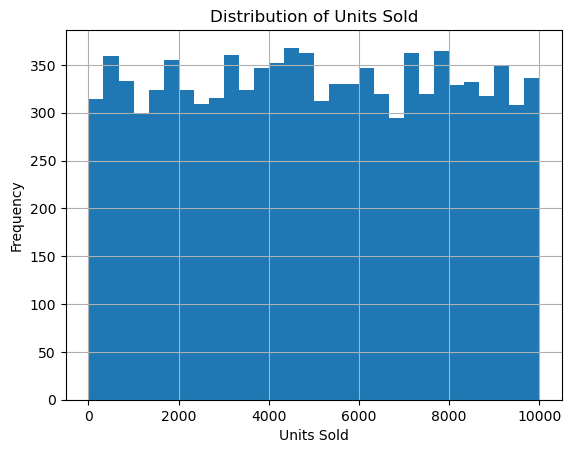

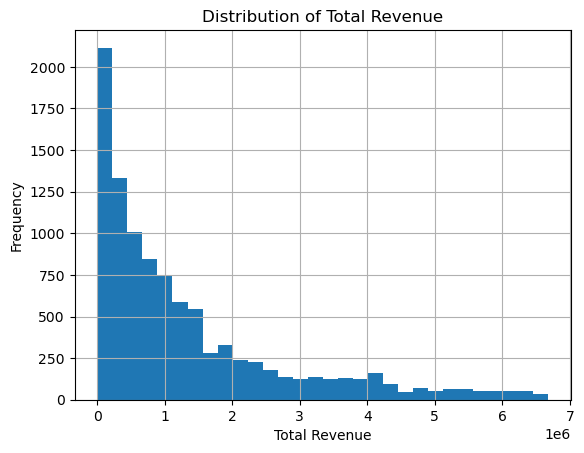

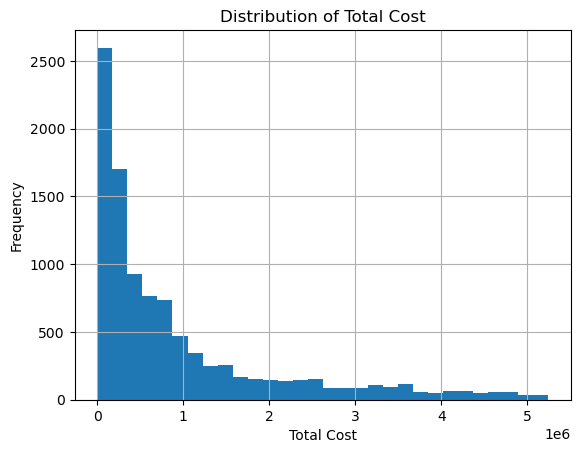

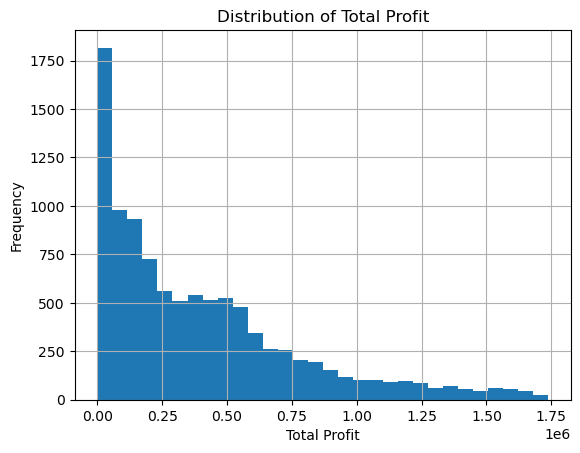

In [9]:
df['Units Sold'].hist(bins=30)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

df['Total Revenue'].hist(bins=30)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

df['Total Cost'].hist(bins=30)
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

df['Total Profit'].hist(bins=30)
plt.title('Distribution of Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Frequency')
plt.show()

## Exploring Categorical Data

In [10]:
# Get distribution for categorical columns
region_distribution = df['Region'].value_counts()
country_distribution = df['Country'].value_counts()
item_type_distribution = df['Item Type'].value_counts()
sales_channel_distribution = df['Sales Channel'].value_counts()
order_priority_distribution = df['Order Priority'].value_counts()

# Print the distributions
print("Region Distribution:\n", region_distribution)
print("\nCountry Distribution:\n", country_distribution)
print("\nItem Type Distribution:\n", item_type_distribution)
print("\nSales Channel Distribution:\n", sales_channel_distribution)
print("\nOrder Priority Distribution:\n", order_priority_distribution)


Region Distribution:
 Region
Europe                               2633
Sub-Saharan Africa                   2603
Asia                                 1469
Middle East and North Africa         1264
Central America and the Caribbean    1019
Australia and Oceania                 797
North America                         215
Name: count, dtype: int64

Country Distribution:
 Country
United Kingdom    72
Lithuania         72
Moldova           71
Seychelles        70
Croatia           70
                  ..
Slovakia          42
Greenland         41
Tajikistan        40
Saint Lucia       39
Mali              35
Name: count, Length: 185, dtype: int64

Item Type Distribution:
 Item Type
Personal Care      888
Household          875
Clothes            872
Baby Food          842
Office Supplies    837
Vegetables         836
Cosmetics          834
Cereal             825
Snacks             816
Meat               798
Fruits             795
Beverages          782
Name: count, dtype: int64

Sales Chan

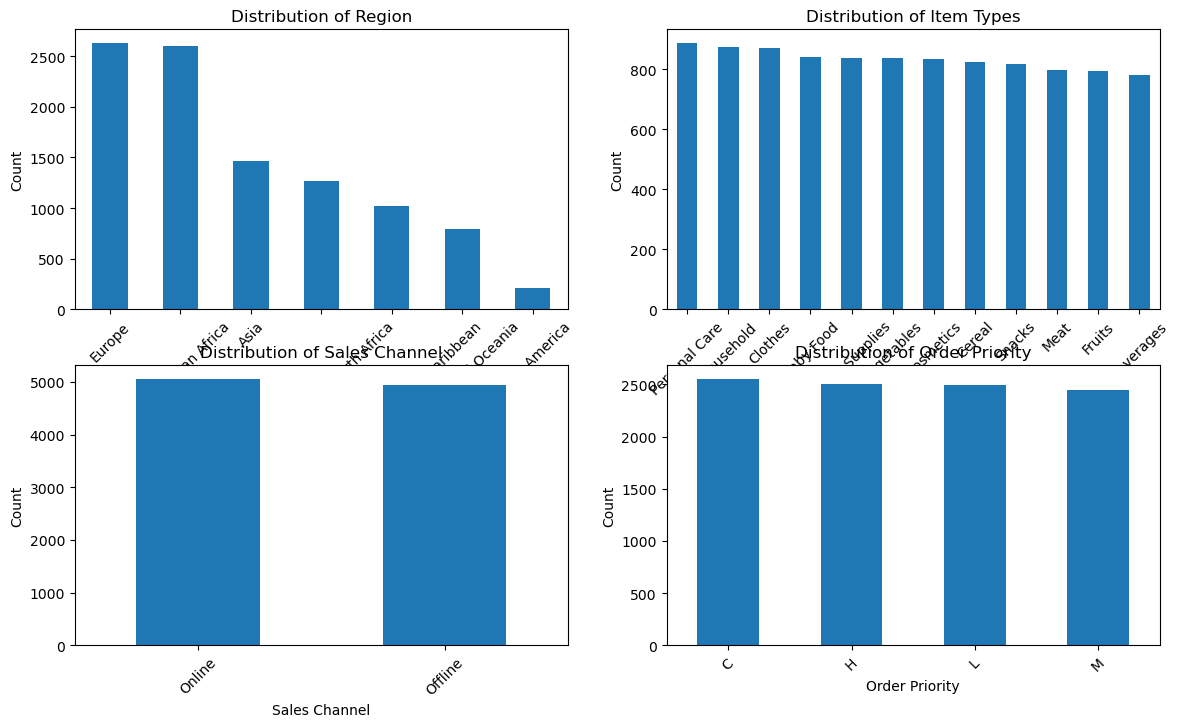

In [11]:
plt.figure(figsize=(14,8))

# Plot the distribution categorrical variables
plt.subplot(2, 2, 1)
region_distribution.plot(kind='bar')
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.subplot(2, 2, 2)
item_type_distribution.plot(kind='bar')
plt.title('Distribution of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.subplot(2, 2, 3)
sales_channel_distribution.plot(kind='bar')
plt.title('Distribution of Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.subplot(2, 2, 4)
order_priority_distribution.plot(kind='bar')
plt.title('Distribution of Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

## Visualizing Numerical as it Relates to Categorical Variables

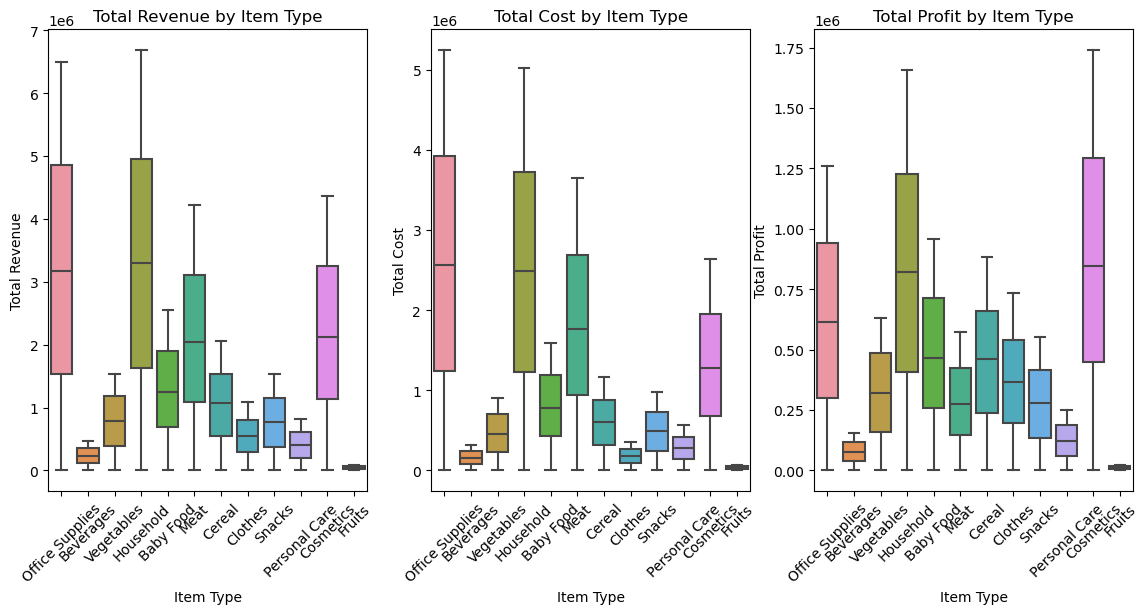

In [12]:
plt.figure(figsize=(14,6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Item Type', y='Total Revenue', data=df)
plt.title('Total Revenue by Item Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Item Type', y='Total Cost', data=df)
plt.title('Total Cost by Item Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Item Type', y='Total Profit', data=df)
plt.title('Total Profit by Item Type')
plt.xticks(rotation=45)
plt.show()

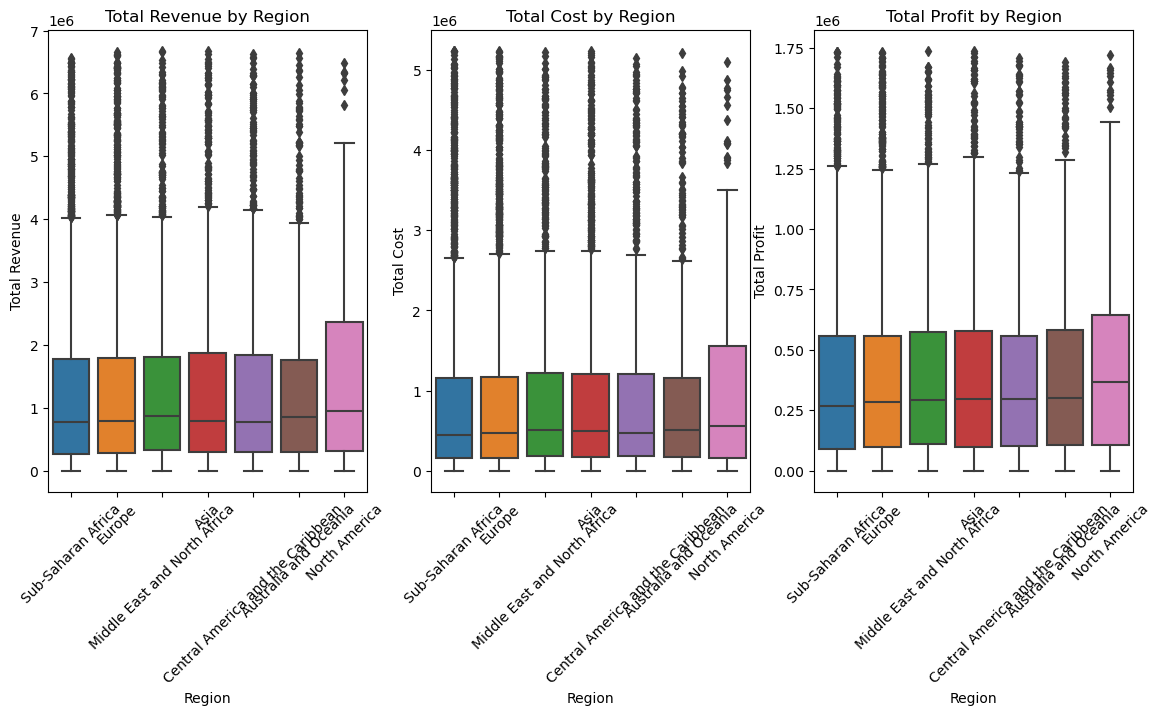

In [13]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Region', y='Total Revenue', data=df)
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Region', y='Total Cost', data=df)
plt.title('Total Cost by Region')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Region', y='Total Profit', data=df)
plt.title('Total Profit by Region')
plt.xticks(rotation=45)
plt.show()

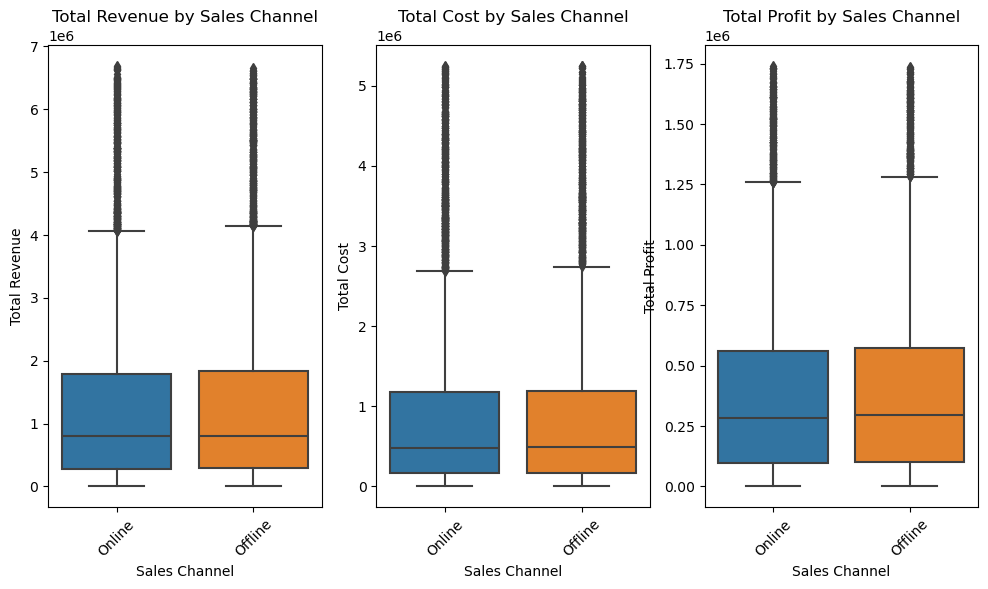

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Sales Channel', y='Total Revenue', data=df)
plt.title('Total Revenue by Sales Channel')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Sales Channel', y='Total Cost', data=df)
plt.title('Total Cost by Sales Channel')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Sales Channel', y='Total Profit', data=df)
plt.title('Total Profit by Sales Channel')
plt.xticks(rotation=45)
plt.show()



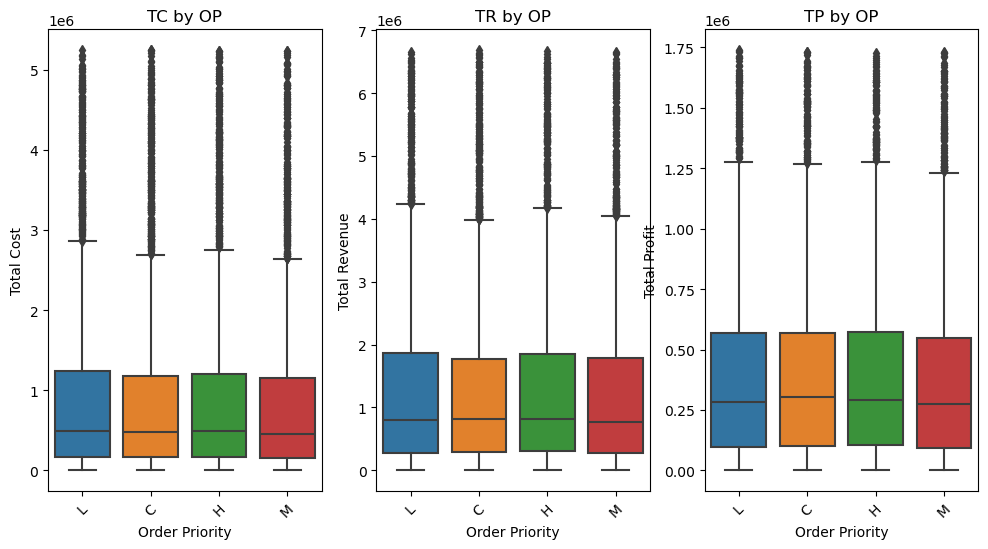

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Order Priority', y='Total Cost', data=df)
plt.title('TC by OP')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Order Priority', y='Total Revenue', data=df)
plt.title('TR by OP')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Order Priority', y='Total Profit', data=df)
plt.title('TP by OP')
plt.xticks(rotation=45)

plt.show()

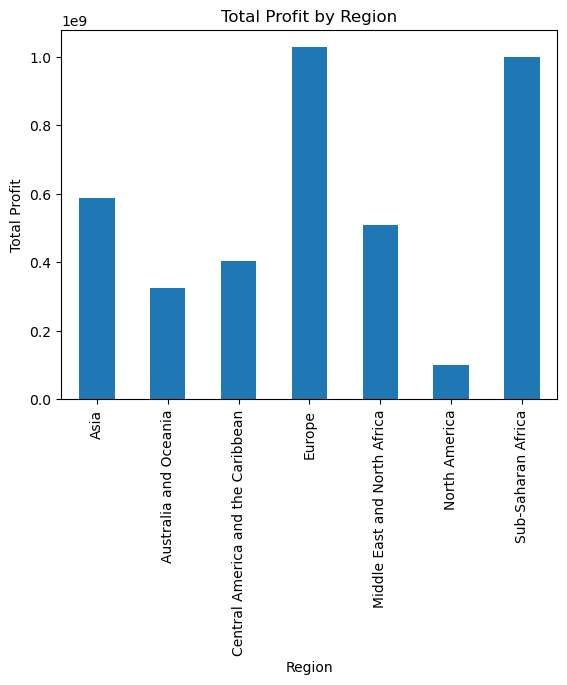

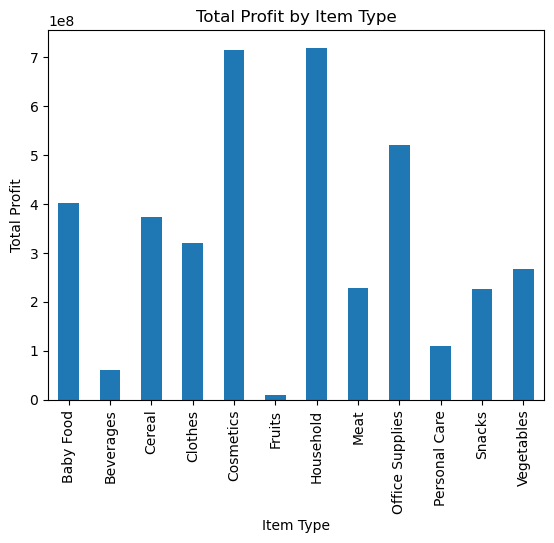

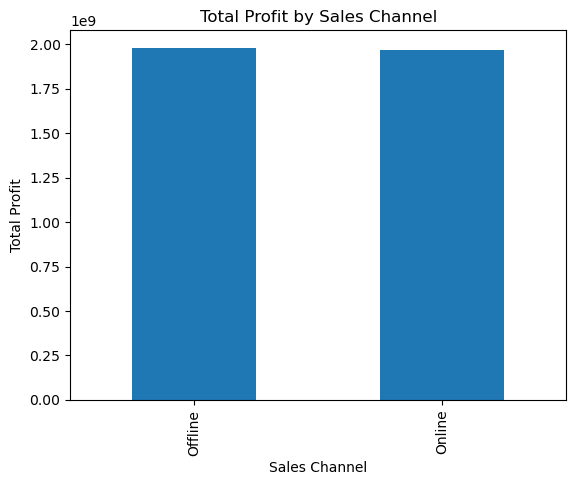

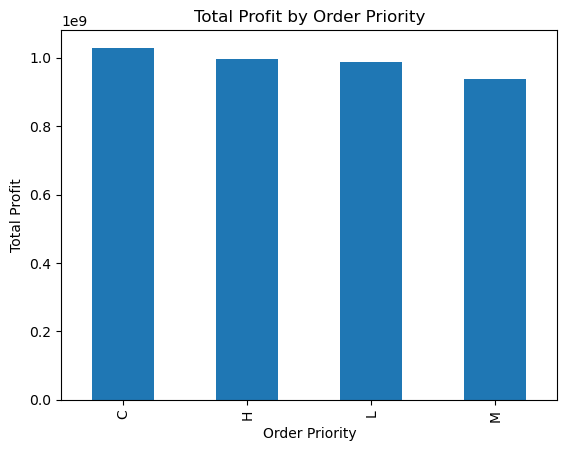

In [16]:
profit_by_region = df.groupby('Region')['Total Profit'].sum()
profit_by_region.plot(kind='bar')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

profit_by_item_type = df.groupby('Item Type')['Total Profit'].sum()
profit_by_item_type.plot(kind='bar')
plt.title('Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.show()

profit_by_sales_channel = df.groupby('Sales Channel')['Total Profit'].sum()
profit_by_sales_channel.plot(kind='bar')
plt.title('Total Profit by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
plt.show()

profit_by_order_priority = df.groupby('Order Priority')['Total Profit'].sum()
profit_by_order_priority.plot(kind='bar')
plt.title('Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.show()

## Correlation Analysis

In [66]:
numerical_columns = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']]

correlation_matrix = numerical_columns.corr()
correlation_matrix

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,-0.012978,-0.012441,0.518615,0.466178,0.597490
Unit Price,-0.012978,1.000000,0.986324,0.733226,0.749243,0.571114
Unit Cost,-0.012441,0.986324,1.000000,0.723267,0.759836,0.500323
Total Revenue,0.518615,0.733226,0.723267,1.000000,0.987874,0.882012
Total Cost,0.466178,0.749243,0.759836,0.987874,1.000000,0.798153
Total Profit,0.597490,0.571114,0.500323,0.882012,0.798153,1.000000


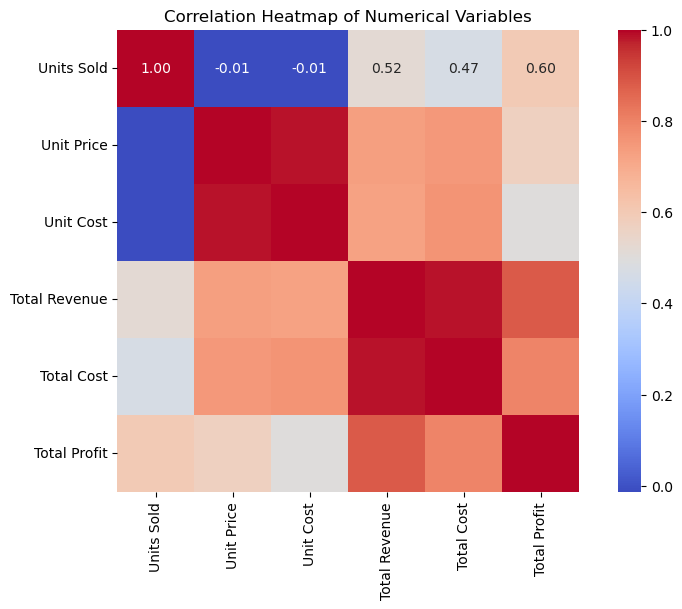

In [67]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title and labels
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Time Series Analysis

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

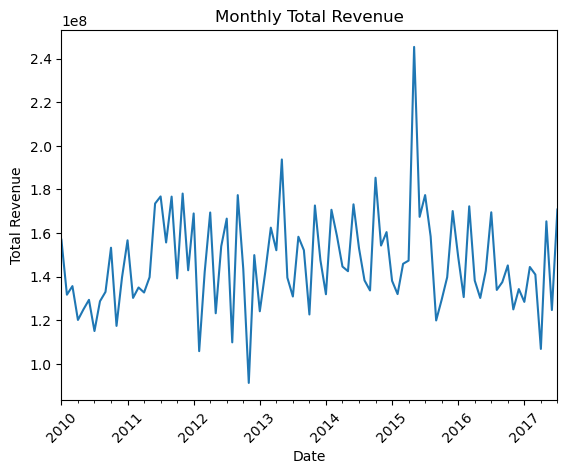

In [20]:
# Analyze Sales Trends Over Time (Using Order Date)

# Group by month and sum total revenue
monthly_revenue = df.groupby(df['Order Date'].dt.to_period('M'))['Total Revenue'].sum()

# Plot the total revenue over time
monthly_revenue.plot(title='Monthly Total Revenue', xlabel='Date', ylabel='Total Revenue')
plt.xticks(rotation=45)
plt.show()

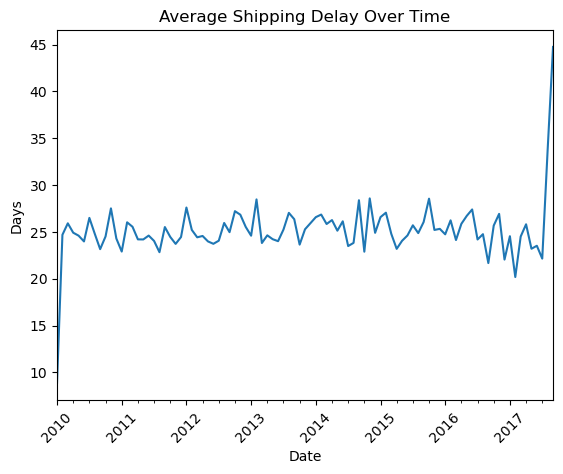

In [21]:
# Analyze Shipping Delays (Using Ship Date)

# Calculate shipping delay
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

# Group by month based on Ship Date to analyze delays
monthly_shipping_delay = df.groupby(df['Ship Date'].dt.to_period('M'))['Shipping Delay'].mean()

# Plot the average shipping delay over time
monthly_shipping_delay.plot(title='Average Shipping Delay Over Time', xlabel='Date', ylabel='Days')
plt.xticks(rotation=45)
plt.show()

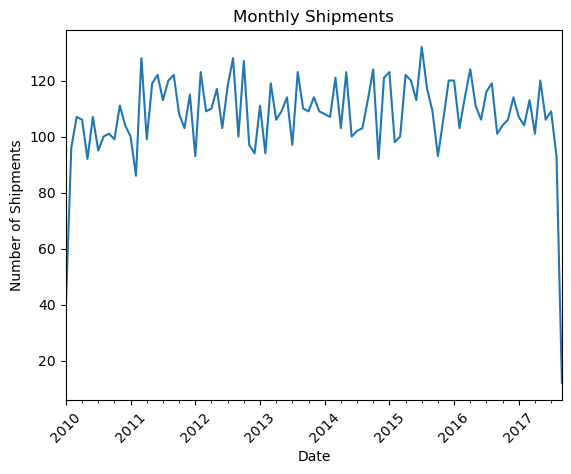

In [22]:
# Analyze Shipments Over Time

# Count the number of shipments per month
monthly_shipments = df.groupby(df['Ship Date'].dt.to_period('M'))['Order ID'].nunique()

# Plot the number of shipments over time
monthly_shipments.plot(title='Monthly Shipments', xlabel='Date', ylabel='Number of Shipments')
plt.xticks(rotation=45)
plt.show()

## Group Comparisons

In [23]:
# Group by different categorical variables and calculate average profit
profit_by_sales_channel = df.groupby('Sales Channel')['Total Profit'].mean().reset_index()
profit_by_order_priority = df.groupby('Order Priority')['Total Profit'].mean().reset_index()
profit_by_item_type = df.groupby('Item Type')['Total Profit'].mean().reset_index()
profit_by_region = df.groupby('Region')['Total Profit'].mean().reset_index()




print(profit_by_sales_channel)
print('')
print(profit_by_order_priority)
print('')
print(profit_by_item_type)
print('')
print(profit_by_region)


  Sales Channel   Total Profit
0       Offline  401073.530834
1        Online  389249.417732

  Order Priority   Total Profit
0              C  402886.664732
1              H  397827.759133
2              L  395566.698027
3              M  383664.958150

          Item Type   Total Profit
0         Baby Food  477820.659335
1         Beverages   78308.731151
2            Cereal  451368.090255
3           Clothes  366555.715596
4         Cosmetics  855442.484772
5            Fruits   12295.307686
6         Household  821415.269931
7              Meat  285669.558897
8   Office Supplies  621485.309140
9     Personal Care  124250.951149
10           Snacks  278590.863162
11       Vegetables  320037.232943

                              Region   Total Profit
0                               Asia  399866.097243
1              Australia and Oceania  406613.816073
2  Central America and the Caribbean  395836.947713
3                             Europe  390049.226282
4       Middle East and North

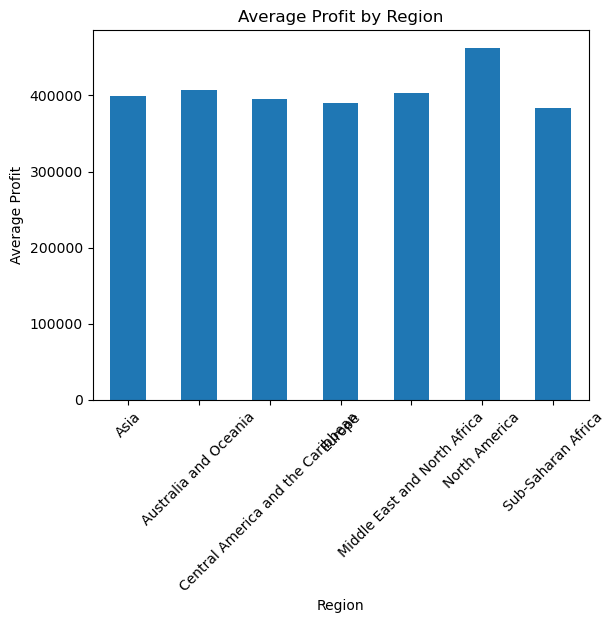

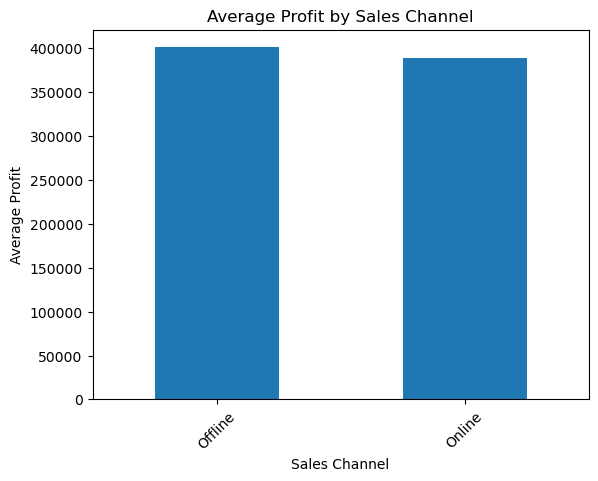

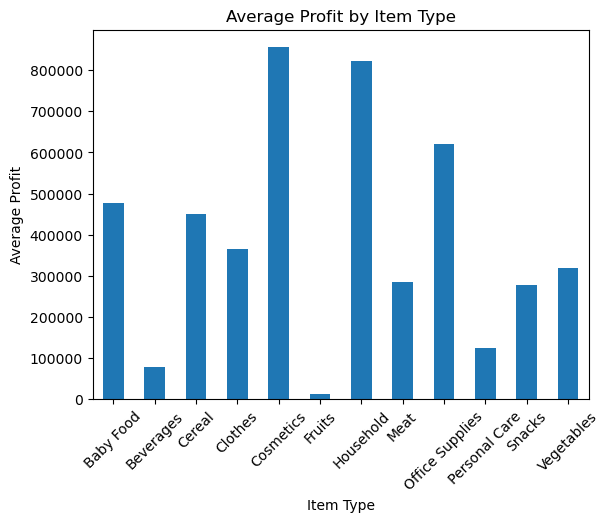

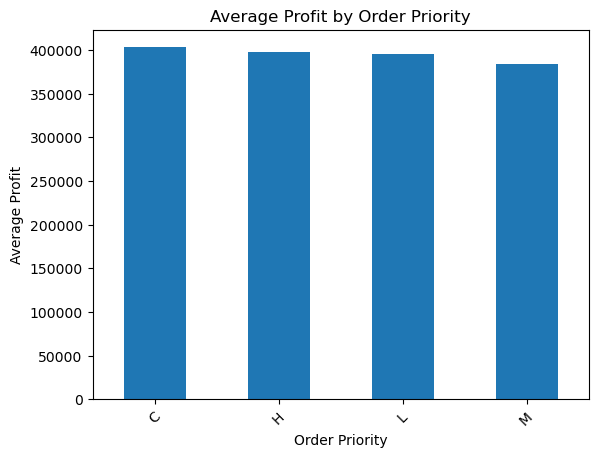

In [24]:
# Plot the average profit by different categorical variables

profit_by_region.plot(kind='bar', x='Region', y='Total Profit', title='Average Profit by Region', legend=False)
plt.xlabel('Region')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()

profit_by_sales_channel.plot(kind='bar', x='Sales Channel', y='Total Profit', title='Average Profit by Sales Channel', legend=False)
plt.xlabel('Sales Channel')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()

profit_by_item_type.plot(kind='bar', x='Item Type', y='Total Profit', title='Average Profit by Item Type', legend=False)
plt.xlabel('Item Type')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()

profit_by_order_priority.plot(kind='bar', x='Order Priority', y='Total Profit', title='Average Profit by Order Priority', legend=False)
plt.xlabel('Order Priority')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()


## Outlier Detection: The Z-Score M

In [25]:
# Calculate Z-scores for Total Profit and Total Revenue
df['Z-Score Total Profit'] = stats.zscore(df['Total Profit'])
df['Z-Score Total Revenue'] = stats.zscore(df['Total Revenue'])
df['Z-Score Total Cost'] = stats.zscore(df['Total Cost'])


In [26]:
# Identify outliers
outliers_profit_z = df[np.abs(df['Z-Score Total Profit']) > 3]
outliers_revenue_z = df[np.abs(df['Z-Score Total Revenue']) > 3]
outliers_cost_z = df[np.abs(df['Z-Score Total Cost']) > 3]

print("Outliers in Total Profit using Z-score:\n", outliers_profit_z)
print("\nOutliers in Total Revenue using Z-score:\n", outliers_revenue_z)
print("\nOutliers in Total Cost using Z-score:\n", outliers_cost_z)

Outliers in Total Profit using Z-score:
                             Region     Country  Item Type Sales Channel  \
43                          Europe    Bulgaria  Cosmetics       Offline   
104          Australia and Oceania      Samoa   Cosmetics        Online   
123                         Europe      Serbia  Cosmetics       Offline   
306                         Europe     Ireland  Cosmetics        Online   
373             Sub-Saharan Africa  Mauritius   Cosmetics        Online   
...                            ...         ...        ...           ...   
9749                 North America      Canada  Household       Offline   
9775            Sub-Saharan Africa    Ethiopia  Household       Offline   
9790  Middle East and North Africa       Libya  Cosmetics       Offline   
9836  Middle East and North Africa        Iraq  Cosmetics        Online   
9977                 North America      Canada  Cosmetics       Offline   

     Order Priority Order Date   Order ID  Ship Date  Unit

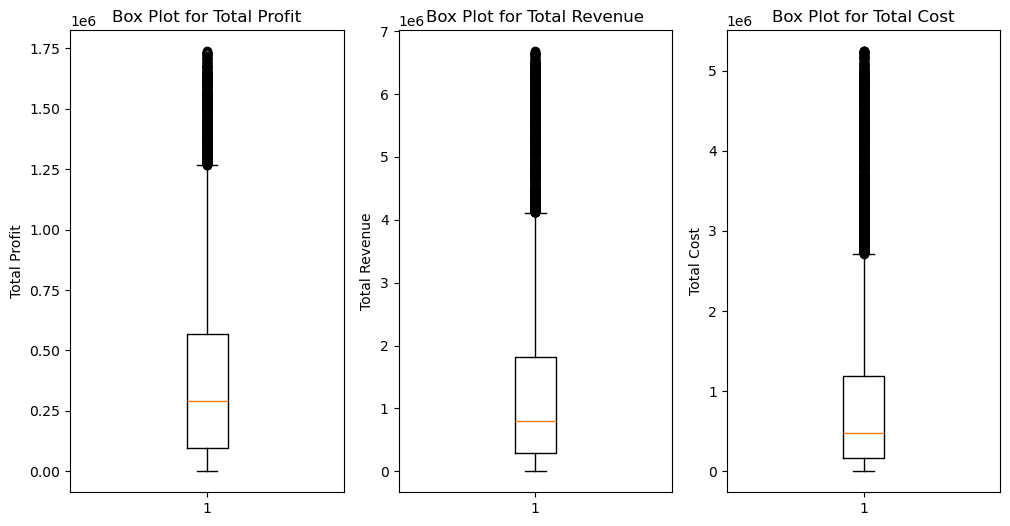

In [27]:
# Box plot for Total Profit
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.boxplot(df['Total Profit'])
plt.title('Box Plot for Total Profit')
plt.ylabel('Total Profit')

# Box plot for Total Revenue
plt.subplot(1, 3, 2)
plt.boxplot(df['Total Revenue'])
plt.title('Box Plot for Total Revenue')
plt.ylabel('Total Revenue')

# Box plot for Total Cost
plt.subplot(1, 3, 3)
plt.boxplot(df['Total Cost'])
plt.title('Box Plot for Total Cost')
plt.ylabel('Total Cost')

plt.show()


## Outlier Detection: The InterQuartile Range, IQR Method

In [28]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_profit = df['Total Profit'].quantile(0.25)
Q3_profit = df['Total Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

Q1_revenue = df['Total Revenue'].quantile(0.25)
Q3_revenue = df['Total Revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue

Q1_cost = df['Total Cost'].quantile(0.25)
Q3_cost = df['Total Cost'].quantile(0.75)
IQR_cost = Q3_cost - Q1_cost


In [29]:
# Define bounds for outliers
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

# Identify outliers
outliers_profit_iqr = df[(df['Total Profit'] < lower_bound_profit) | (df['Total Profit'] > upper_bound_profit)]
outliers_revenue_iqr = df[(df['Total Revenue'] < lower_bound_revenue) | (df['Total Revenue'] > upper_bound_revenue)]

print("Outliers in Total Profit using IQR:\n", outliers_profit_iqr)
print("\nOutliers in Total Revenue using IQR:\n", outliers_revenue_iqr)


Outliers in Total Profit using IQR:
                             Region                           Country  \
3               Sub-Saharan Africa  Democratic Republic of the Congo   
43                          Europe                          Bulgaria   
104          Australia and Oceania                            Samoa    
123                         Europe                            Serbia   
135                           Asia                            Bhutan   
...                            ...                               ...   
9905                        Europe                        Luxembourg   
9907                          Asia                        Uzbekistan   
9958  Middle East and North Africa                           Lebanon   
9962                        Europe                          Bulgaria   
9977                 North America                            Canada   

      Item Type Sales Channel Order Priority Order Date   Order ID  Ship Date  \
3     Household  

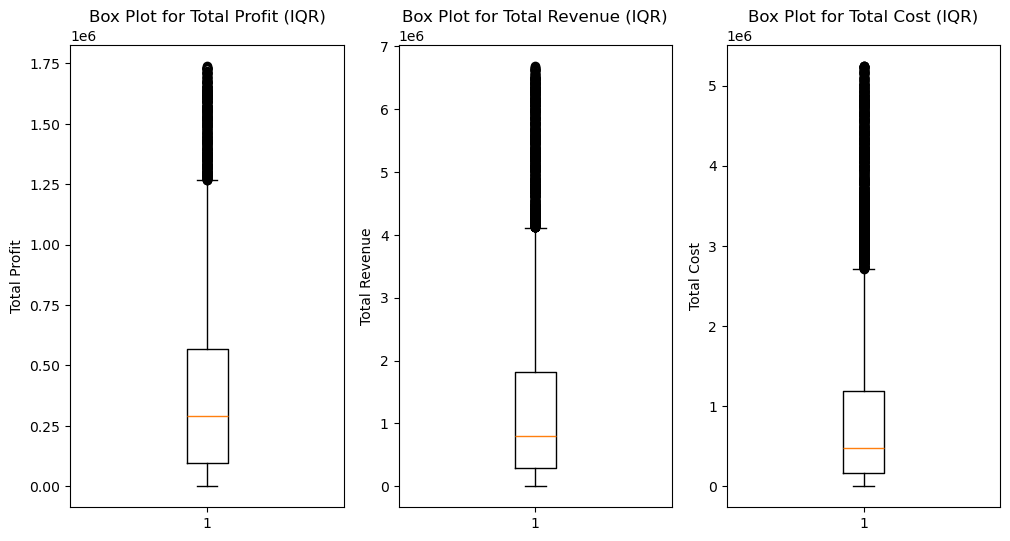

In [30]:
# Box plot for Total Profit
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.boxplot(df['Total Profit'])
plt.title('Box Plot for Total Profit (IQR)')
plt.ylabel('Total Profit')

# Box plot for Total Revenue
plt.subplot(1, 3, 2)
plt.boxplot(df['Total Revenue'])
plt.title('Box Plot for Total Revenue (IQR)')
plt.ylabel('Total Revenue')

# Box plot for Total Revenue
plt.subplot(1, 3, 3)
plt.boxplot(df['Total Cost'])
plt.title('Box Plot for Total Cost (IQR)')
plt.ylabel('Total Cost')

plt.show()

## Feature Engineering

## Profit margin as a derived feature

In [31]:
df = df[(df['Total Revenue'] != 0)]

# Calculate Profit Margin as a new feature
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']


In [32]:
df['Profit Margin'].describe()


count    10000.000000
mean         0.344981
std          0.132653
min          0.135580
25%          0.247999
50%          0.361384
75%          0.409775
max          0.672035
Name: Profit Margin, dtype: float64

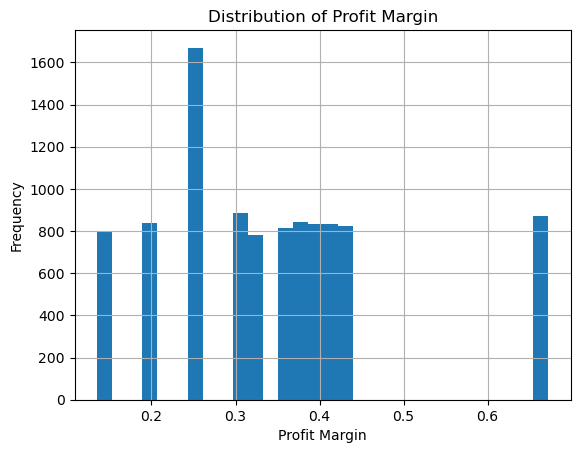

In [33]:
df['Profit Margin'].hist(bins=30)
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Profit Margin')

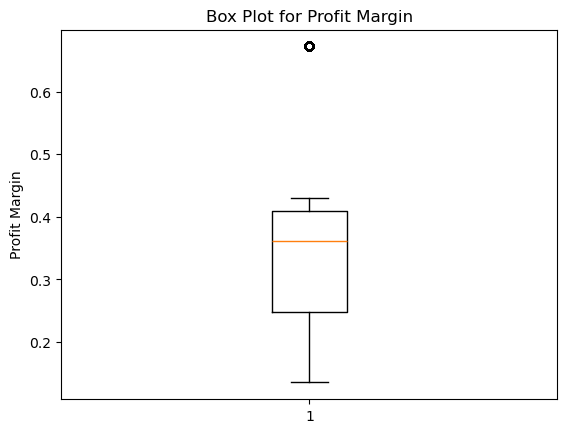

In [34]:
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 3, 1)
plt.boxplot(df['Profit Margin'])
plt.title('Box Plot for Profit Margin')
plt.ylabel('Profit Margin')

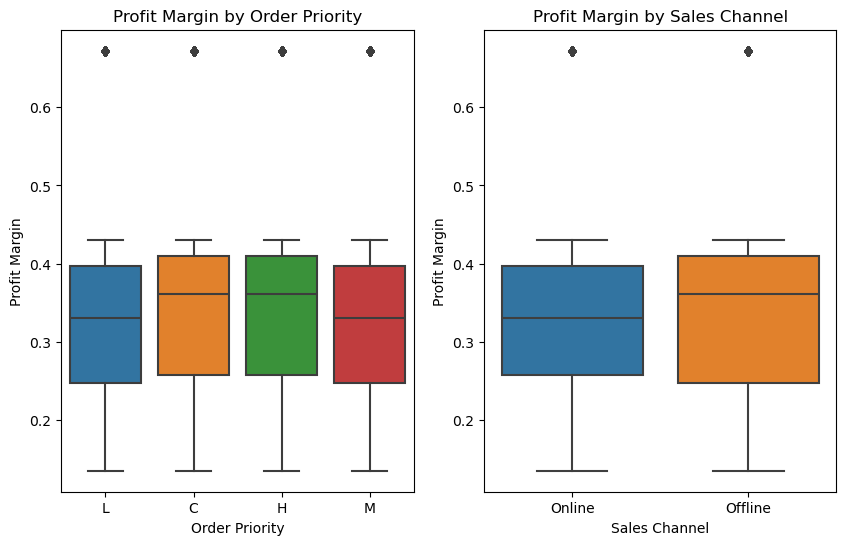

In [35]:
# Boxplot of Profit Margin by Order Priority
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Order Priority', y='Profit Margin')
plt.title('Profit Margin by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Profit Margin')

# Boxplot of Profit Margin by Order Priority
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Sales Channel', y='Profit Margin')
plt.title('Profit Margin by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Profit Margin')

plt.show()

## Conversion of Order Priority and Sales Channel Features to Numerical Values

In [36]:
order_priority_mapping = {'L': 1, 'M': 2, 'H': 3, 'C': 4}
df['Order Priority Numeric'] = df['Order Priority'].map(order_priority_mapping)

sales_channel_mapping = {'Online': 1, 'Offline': 0}
df['Sales Channel Numeric'] = df['Sales Channel'].map(sales_channel_mapping)

## Detecting Outlier in 'Profit Margin' Feature

In [37]:
df['Z-Score Profit Margin'] = stats.zscore(df['Profit Margin'])

outliers_profit_margin_z = df[np.abs(df['Z-Score Profit Margin']) > 3]

print("Outliers in Profit Margin using Z-score:\n", outliers_profit_margin_z)

Outliers in Profit Margin using Z-score:
 Empty DataFrame
Columns: [Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Order ID, Ship Date, Units Sold, Unit Price, Unit Cost, Total Revenue, Total Cost, Total Profit, Shipping Delay, Z-Score Total Profit, Z-Score Total Revenue, Z-Score Total Cost, Profit Margin, Order Priority Numeric, Sales Channel Numeric, Z-Score Profit Margin]
Index: []

[0 rows x 22 columns]


In [38]:
Q1_profit_margin = df['Profit Margin'].quantile(0.25)
Q3_profit_margin = df['Profit Margin'].quantile(0.75)
IQR_profit_margin = Q3_profit_margin - Q1_profit_margin

In [39]:
lower_bound_profit_margin = Q1_profit_margin - 1.5 * IQR_profit_margin
upper_bound_profit_margin = Q3_profit_margin + 1.5 * IQR_profit_margin

In [40]:
outliers_profit_margin_iqr = df[(df['Profit Margin'] < lower_bound_profit_margin) | (df['Profit Margin'] > upper_bound_profit_margin)]

print("Outliers in Profit Margin using IQR:\n", outliers_profit_margin_iqr)

Outliers in Profit Margin using IQR:
                             Region     Country Item Type Sales Channel  \
14    Middle East and North Africa     Algeria   Clothes       Offline   
26                          Europe      Greece   Clothes        Online   
41                            Asia      Bhutan   Clothes       Offline   
42    Middle East and North Africa      Turkey   Clothes        Online   
51           Australia and Oceania      Samoa    Clothes       Offline   
...                            ...         ...       ...           ...   
9921            Sub-Saharan Africa        Togo   Clothes       Offline   
9924            Sub-Saharan Africa      Rwanda   Clothes       Offline   
9926                          Asia   Sri Lanka   Clothes        Online   
9960  Middle East and North Africa       Egypt   Clothes       Offline   
9981                          Asia  Kazakhstan   Clothes        Online   

     Order Priority Order Date   Order ID  Ship Date  Units Sold  Unit Pr

# Encoding other categorical features using One-Hot Encoding

In [41]:
data = pd.get_dummies(df, columns=['Region', 'Item Type'], drop_first=False)


In [42]:
data.shape

(10000, 39)

In [43]:
data.columns

Index(['Country', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID',
       'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit', 'Shipping Delay', 'Z-Score Total Profit',
       'Z-Score Total Revenue', 'Z-Score Total Cost', 'Profit Margin',
       'Order Priority Numeric', 'Sales Channel Numeric',
       'Z-Score Profit Margin', 'Region_Asia', 'Region_Australia and Oceania',
       'Region_Central America and the Caribbean', 'Region_Europe',
       'Region_Middle East and North Africa', 'Region_North America',
       'Region_Sub-Saharan Africa', 'Item Type_Baby Food',
       'Item Type_Beverages', 'Item Type_Cereal', 'Item Type_Clothes',
       'Item Type_Cosmetics', 'Item Type_Fruits', 'Item Type_Household',
       'Item Type_Meat', 'Item Type_Office Supplies',
       'Item Type_Personal Care', 'Item Type_Snacks', 'Item Type_Vegetables'],
      dtype='object')

In [44]:
# List of columns to drop
columns_to_drop = [
    'Z-Score Total Profit', 'Country', 'Sales Channel', 'Order Priority', 'Z-Score Total Revenue', 'Z-Score Total Cost', 
    'Z-Score Profit Margin', 'Shipping Delay', 'Order ID', 
    'Order Date', 'Ship Date'
]

# Drop the columns
data = data.drop(columns=columns_to_drop)

# Verify the changes
print(data.columns)


Index(['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit', 'Profit Margin', 'Order Priority Numeric',
       'Sales Channel Numeric', 'Region_Asia', 'Region_Australia and Oceania',
       'Region_Central America and the Caribbean', 'Region_Europe',
       'Region_Middle East and North Africa', 'Region_North America',
       'Region_Sub-Saharan Africa', 'Item Type_Baby Food',
       'Item Type_Beverages', 'Item Type_Cereal', 'Item Type_Clothes',
       'Item Type_Cosmetics', 'Item Type_Fruits', 'Item Type_Household',
       'Item Type_Meat', 'Item Type_Office Supplies',
       'Item Type_Personal Care', 'Item Type_Snacks', 'Item Type_Vegetables'],
      dtype='object')


In [45]:
data.shape

(10000, 28)

# MACHINE LEARNING

## Features and Target Variable Definition

In [46]:
# Define features (X) and target (y)
X = data.drop(['Total Profit'], axis=1)  # Drop irrelevant columns
y = data['Total Profit']

In [47]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [48]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### Model Evaluation of Linear Regressor

In [49]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE for Linear Regressor: {mse}')
print(f'MAE for Linear Regressor: {mae}')
print(f'R-squared for Linear Regressor: {r2}')

MSE for Linear Regressor: 4.132066454106377e-19
MAE for Linear Regressor: 5.555135018653345e-10
R-squared for Linear Regressor: 1.0


### Performance Visualization of Linear Regression Model

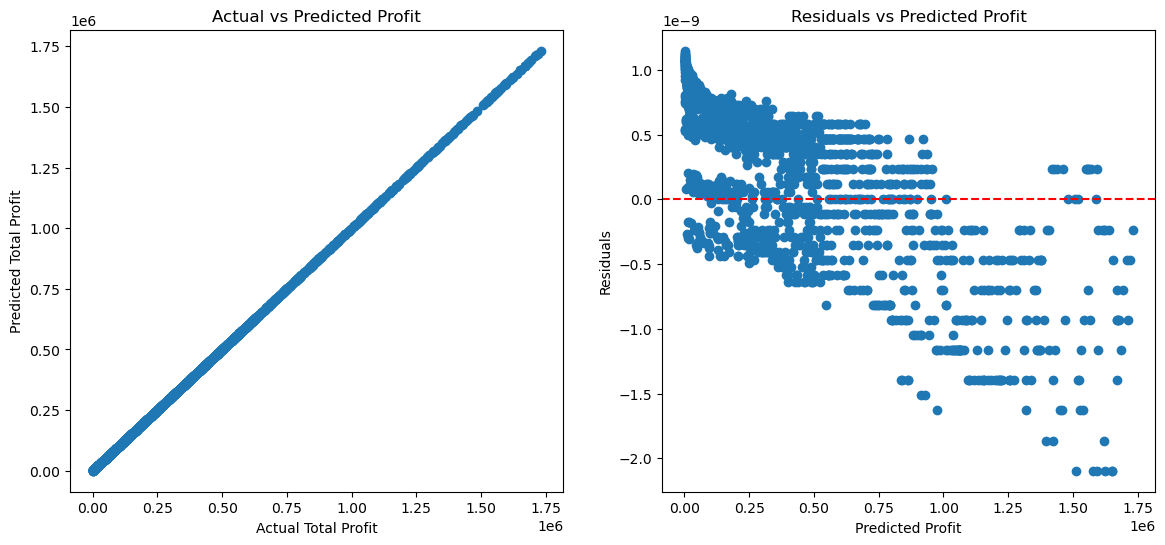

In [50]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Total Profit')
plt.ylabel('Predicted Total Profit')
plt.title('Actual vs Predicted Profit')


residuals = y_test - y_pred # to check for Patterns or Biases in Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Profit')

plt.show()

## Random Forest Regressor

In [51]:
# Initialize with tuned parameters
rf_model = RandomForestRegressor() #n_estimators=500, 
                                      # min_samples_split=2, 
                                       #max_depth=30,
                                      # random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
rf_pred = rf_model.predict(X_test)
# print('Random Forest R²:', r2_score(y_test, rf_pred))


### Model Evaluatiion of Random Forest Regressor

In [52]:
# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, rf_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print(f'MSE for Random Forest: {mse_rf}')
print(f'MAE for Random Forest: {mae_rf}')
print(f'R-squared for Random Forest: {r2_rf}')

MSE for Random Forest: 1009708.2655100462
MAE for Random Forest: 595.3527201000143
R-squared for Random Forest: 0.9999931290587607


### Performance Visualization of Random Forest Regressor

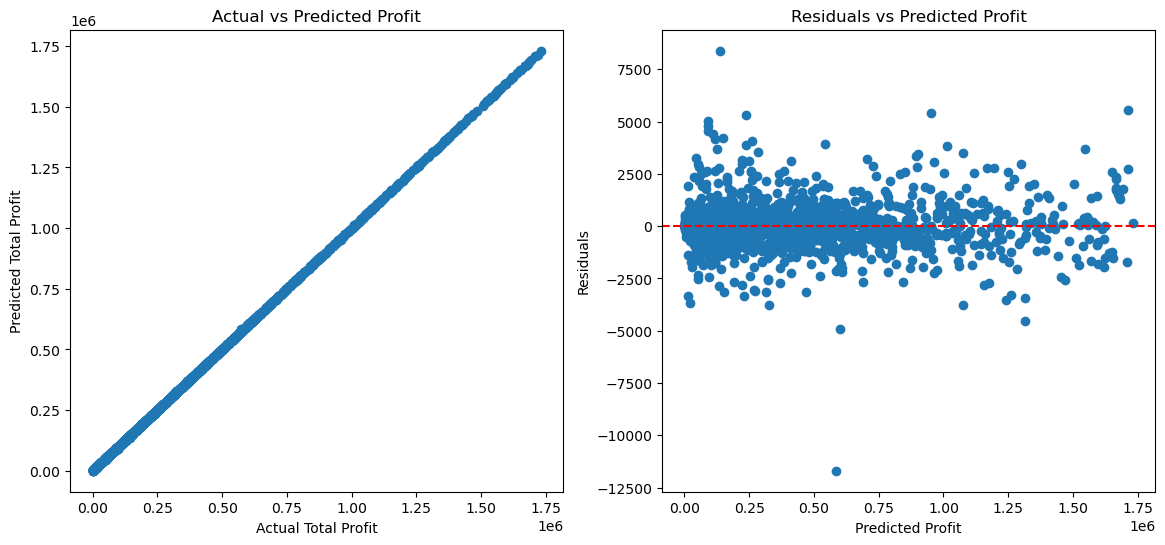

In [53]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Total Profit')
plt.ylabel('Predicted Total Profit')
plt.title('Actual vs Predicted Profit')

residuals2 = y_test - rf_pred
plt.subplot(1, 2, 2)
plt.scatter(rf_pred, residuals2)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Profit')
plt.show()

### Feature Selection and Importance

In [54]:
X.shape

(10000, 27)

In [55]:
# Get feature importance (for Random Forest)
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a dataframe to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

#feature_importance_df

                                     Feature    Importance
3                              Total Revenue  8.197354e-01
5                              Profit Margin  1.042012e-01
0                                 Units Sold  3.789753e-02
19                       Item Type_Cosmetics  1.317417e-02
4                                 Total Cost  9.472596e-03
22                            Item Type_Meat  5.435218e-03
2                                  Unit Cost  4.099060e-03
18                         Item Type_Clothes  2.845056e-03
1                                 Unit Price  1.498944e-03
23                 Item Type_Office Supplies  8.270432e-04
21                       Item Type_Household  4.428777e-04
17                          Item Type_Cereal  1.191182e-04
25                          Item Type_Snacks  1.165916e-04
15                       Item Type_Baby Food  7.143336e-05
26                      Item Type_Vegetables  5.468243e-05
6                     Order Priority Numeric  2.359923e-

### Graphical representation of the two most important Features

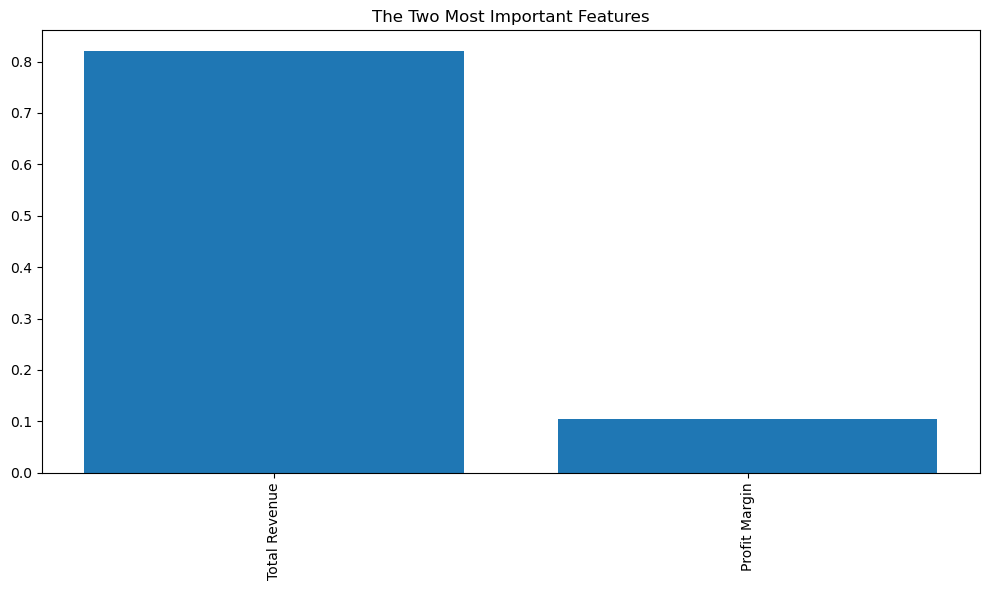

In [56]:
# Assuming you've already trained your model (model)
# and have the feature names in a list called 'feature_names'

# Define the importance range (e.g., between 0.8 and 0.02)
min_importance = 0.09
max_importance = 0.9

# Filter the features within the specified importance range
filtered_indices = [i for i in range(len(importances)) if min_importance <= importances[i] <= max_importance]

# Sort the filtered features by their importance in descending order
sorted_filtered_indices = np.argsort(importances[filtered_indices])[::-1]

# Create a bar plot for the filtered feature importances
plt.figure(figsize=(10, 6))
# plt.title(f"Filtered Feature Importances (Between {min_importance} and {max_importance})")
plt.title('The Two Most Important Features')
plt.bar(range(len(sorted_filtered_indices)), importances[filtered_indices][sorted_filtered_indices], align='center')

# Add feature names as x-axis labels
plt.xticks(range(len(sorted_filtered_indices)), 
           [feature_names[filtered_indices[i]] for i in sorted_filtered_indices], 
           rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


## Gradient Boosting Regressor

In [57]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
gbr_pred = gbr.predict(X_test)

### Model Evaluatiion of Gradient Boosting Regressor

In [58]:
# Calculate evaluation metrics
mse_gbr = mean_squared_error(y_test, gbr_pred)
mae_gbr = mean_absolute_error(y_test, gbr_pred)
r2_gbr = r2_score(y_test, gbr_pred)

print(f'MSE for Gradient Boosting: {mse_gbr}')
print(f'MAE for Gradient Boosting: {mae_gbr}')
print(f'R-squared for Gradient Boosting: {r2_gbr}')

MSE for Gradient Boosting: 136716862.49381518
MAE for Gradient Boosting: 8479.666377049576
R-squared for Gradient Boosting: 0.9990696584739392


### Performance Visualization of Gradient Boosting Regressor

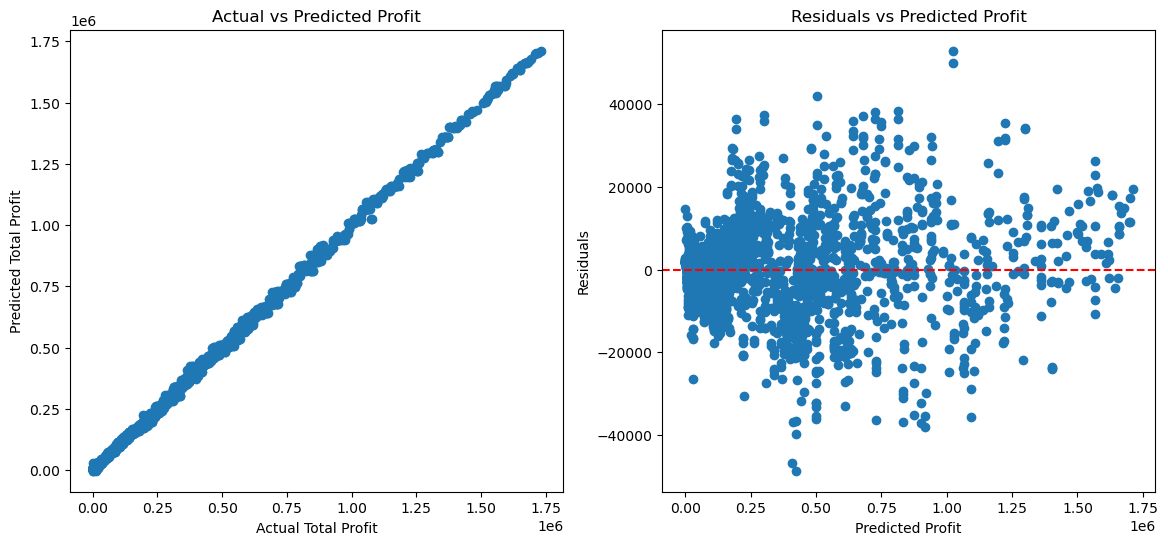

In [59]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, gbr_pred)
plt.xlabel('Actual Total Profit')
plt.ylabel('Predicted Total Profit')
plt.title('Actual vs Predicted Profit')


residuals3 = y_test - gbr_pred
plt.subplot(1, 2, 2)
plt.scatter(gbr_pred, residuals3)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Profit')
plt.show()

## Ridge Regressor

In [60]:
# Initialize the Ridge Regression model
ridge = Ridge()

# Train the model
ridge.fit(X_train, y_train)

# Make predictions
ridge_pred = ridge.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61098e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [61]:
# Calculate evaluation metrics
mse_ridge = mean_squared_error(y_test, ridge_pred)
mae_ridge = mean_absolute_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

print(f'MSE for Ridge Regressor: {mse_ridge}')
print(f'MAE for Ridge Regressor: {mae_ridge}')
print(f'R-squared for Ridge Regressor: {r2_ridge}')

MSE for Ridge Regressor: 7.679010941378539e-17
MAE for Ridge Regressor: 6.204963447942191e-09
R-squared for Ridge Regressor: 1.0


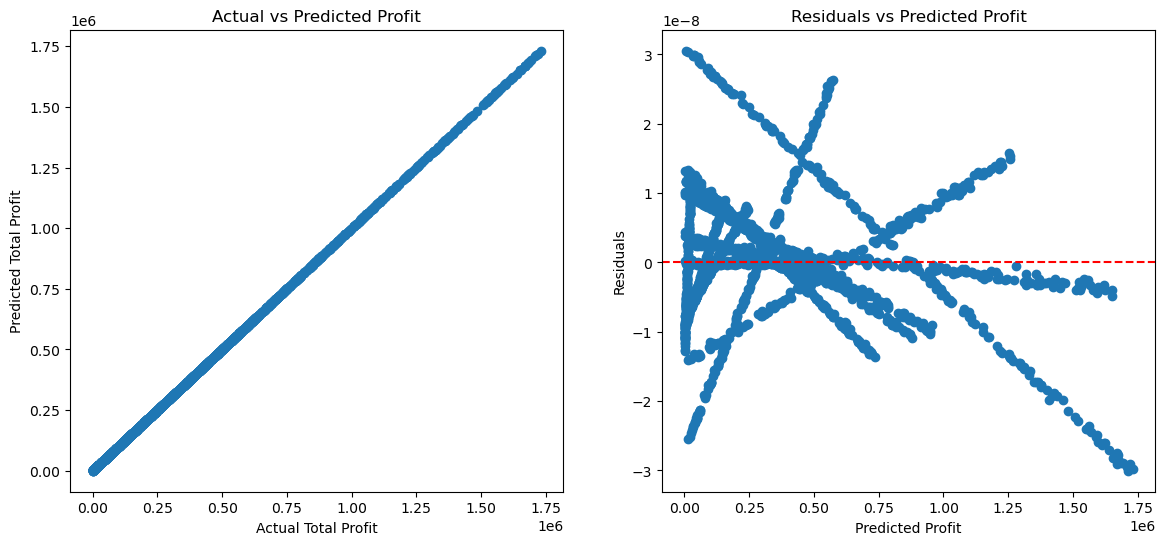

In [62]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_pred)
plt.xlabel('Actual Total Profit')
plt.ylabel('Predicted Total Profit')
plt.title('Actual vs Predicted Profit')


residuals4 = y_test - ridge_pred
plt.subplot(1, 2, 2)
plt.scatter(ridge_pred, residuals4)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Profit')
plt.show()